In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from statsmodels.stats import weightstats as stests

In [2]:
with open('/Users/dasha/Downloads/EDA_human_temperature/sliderule_dsi_inferential_statistics_exercise_1.ipynb','r') as file: 
    print(file.read())

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# What is the True Normal Human Body Temperature? \n",
    "\n",
    "#### Background\n",
    "\n",
    "The mean normal body temperature was held to be 37$^{\\circ}$C or 98.6$^{\\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "<h3>Exercises</h3>\n",
    "\n",
    "<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>\n",
    "\n",
    "<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> \n",
    "\n",
    "<ol>\n",
    "<li>  Is the distribution of body temperatures normal? \n",
    "    <ul>\n",
    "    <li> Although this is not a req

In [103]:
df=pd.read_csv('/Users/dasha/Downloads/EDA_human_temperature/data/human_body_temperature.csv')

In [104]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


Text(0,0.5,'count')

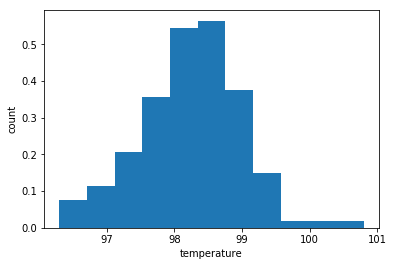

In [105]:
### Is the temperature variable normal??? 
temperature=np.array(df['temperature'])
bins=int(np.sqrt(len(temperature)))
plt.hist(temperature,bins=bins, density=True)
plt.xlabel('temperature')
plt.ylabel('count')
# From the histogram the temperature variable seems to be positively skewed 

In [106]:
### What does the normal distribution look like for this sample's mean and std, approximately???
temp_normal=np.random.normal((np.mean(temperature)),(np.std(temperature)),10000)

Text(0,0.5,'ecdf')

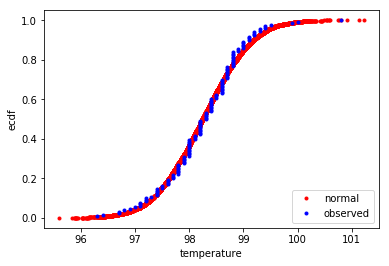

In [107]:
# Take a look at the ecdf??? 

def ecdf(data): 
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y 

normal_x,normal_y = ecdf(temp_normal)
temp_x,temp_y=ecdf(temperature)
plt.plot(normal_x,normal_y, marker='.',linestyle='none',color='red')
plt.plot(temp_x,temp_y,marker='.',linestyle='none',color='blue')
plt.legend(['normal','observed'],loc='lower right')
plt.xlabel('temperature')
plt.ylabel('ecdf')
# the two lines are close but the right tail seems to be a bit off 

Text(0,0.5,'degrees F')

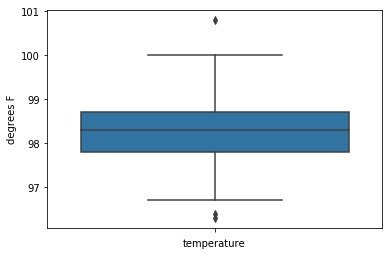

In [108]:
### Are there a lot of outliers??? 
sns.boxplot(temperature,orient='v')
plt.xlabel('temperature')
plt.ylabel('degrees F')

In [109]:
### Test normality using Shapiro-Wilk for normality 
### Null Hypothesis Ho = temperature follows normal distribution 
### Alternative Hypothesis Ha = temperture follows an alterantive distribution pattern
shapiro_values = scipy.stats.shapiro(temperature)
shapiro_pvalue=shapiro_values[1]
shapiro_pvalue

0.233174666762352

In [110]:
### p-value of .23 is is significantly large even for 1% level of significance and therefore, we 
### fail to reject the null hypothesis, that is ... temperature does seems to follow normal distribution 

In [111]:
### Is the sample large enough? Are they independent? 
### The rule of thumb is that the sample size should at least be 10 (or>30 to be very sure)
# and we have here >100

In [112]:
# Is the true populations mean really 98.6 F? 
def draw_bs_rep(data,func,size): 
    bs_rep=np.empty(size)
    for i in range(size): 
        bs_rep[i]=func(np.random.choice(data,len(data))) 
    return bs_rep
bs_rep=draw_bs_rep(temperature,np.mean,1000)
print(np.mean(bs_rep))


98.24616


What is the p-value for the scenario that true mean is 98.6 F???
p-value:  0.0
The true mean is approx.:  98.24616


Text(0,0.5,'count')

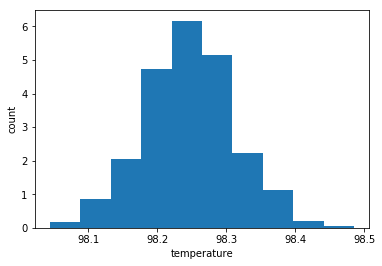

In [113]:
### Bootstrap hypothesis test 
plt.hist(bs_rep,density=True)
print('What is the p-value for the scenario that true mean is 98.6 F???')
pvalue=np.sum(bs_rep>=98.6)/len(bs_rep)
print('p-value: ',pvalue)
print('The true mean is approx.: ',np.mean(bs_rep))
plt.xlabel('temperature')
plt.ylabel('count')
# No the true mean is not 98.6 F 
# bootstrapping uses the CDF of the distribution to computes/estimates 
#true sampling distribution which does not necessrily have to be normal 

In [114]:
# Since this is comparing a mean of one sample to its population mean we would have 
# to use the one sample t-test 
# Two sample t-test would be comparing means between two groups of data
# Either t-statistic or z-statistic can be used since the sample size is >30  
# Using the t-test with the sample size provided (>30) is similar to z-test

In [115]:
t_pvalue=scipy.stats.ttest_1samp(temperature,98.6)[1]
print('p-value for the one sample t-test: ',t_pvalue)
print('We reject the null hypothesis that the true mean is 98.6')

p-value for the one sample t-test:  2.4106320415561276e-07
We reject the null hypothesis that the true mean is 98.6


In [116]:
z_pvalue=stests.ztest(temperature,value=98.6)[1]
print('p-value for the one sample z-test: ',z_pvalue)
print('We reject the null hypothesis that the true mean is 98.6')

p-value for the one sample z-test:  4.9021570141012155e-08
We reject the null hypothesis that the true mean is 98.6


In [117]:
# The z p-value and t p-value are both very small, however the z p-value is smaller than the 
# t p-value. They should technically be approximately the same for sample size >30. 
# However, we have to remember that the data here is not normal 

In [118]:
ten_sample=np.random.choice(temperature,10)
t_pvalue=scipy.stats.ttest_1samp(ten_sample,98.6)[1]
print('p-value for the one sample t-test on 10 sample group: ',t_pvalue)
print('We fail to reject the null hypothesis that the true mean is 98.6')

p-value for the one sample t-test on 10 sample group:  0.5134695196339307
We fail to reject the null hypothesis that the true mean is 98.6


In [119]:
z_pvalue=stests.ztest(ten_sample,value=98.6)[1]
print('p-value for the one sample z-test on 10 sample group: ',z_pvalue)
print('We fail to reject the null hypothesis that the true mean is 98.6')

p-value for the one sample z-test on 10 sample group:  0.4963532168954795
We fail to reject the null hypothesis that the true mean is 98.6


In [120]:
# For the 10 sample test we see that the t-test p-value is more extreme than the z-test and 
# this is probably due to the fact that the z-test does not work well with sample sizes below
# 30
# The correct test here to use is the t-test 
# For higher sample sizes where the sample population can be approximated to be normal 
# z test could be used 
# On the other hand with small sizes (<30), z-statistic is not desirable and t-statistic 
# should be used 

In [121]:
# Standard Error of Mean for temperature 
scipy.stats.sem(temperature)

0.06430441683789102

In [122]:
#What temperature is abnormal??? 
# The bootstrap approach.....
confidence=np.percentile(bs_rep,[2.5,97.5])
print('Temperature that are abnormal using bootstrap statistic: ',confidence)

Temperature that are abnormal using bootstrap statistic:  [98.11613462 98.37615385]


In [123]:
# The t confidence interval .... 
t_conf=scipy.stats.t.interval(.05,(len(temperature)-1))
np.mean(temperature)+t_conf
print('Temperature that are abnormal using t-test statistic: ',confidence)

Temperature that are abnormal using t-test statistic:  [98.11613462 98.37615385]


In [144]:
### Is the temperature different between males and females ???

df_male=df[df['gender']=='M']
df_female=df[df['gender']=='F']
female_temp=np.array(df_female['temperature'])
male_temp=np.array(df_male['temperature'])


def permutation(data1,data2): 
    concat=np.concatenate((data1,data2))
    permut=np.random.permutation(concat)
    per_data_1=permut[:len(data1)]
    per_data_2=permut[len(data2):]
    return per_data_1,per_data_2 

def permutation_rep(data_1,data_2,func,size=1):
    rep=np.empty(size)
    for i in range(size):
        perm_1,perm_2 = permutation(data_1,data_2)
        rep[i]= func(perm_1,perm_2)
    return rep
def mean_diff(data__1,data__2):
    diff_of_means=np.mean(data__1)-np.mean(data__2)
    return diff_of_means 


obs_diff_mean=mean_diff(female_temp,male_temp)
diff_mean_rep=permutation_rep(female_temp,male_temp,mean_diff,10000)
print('The observed difference of means between female and male temperatures is: ',obs_diff_mean)
p_value=np.sum(diff_mean_rep >=obs_diff_mean)/len(diff_mean_rep)
print("The p-value for the permutation statistic is: ",p_value)
print('Considering the level of significance to be 5%, the p-value is less than the level of significance \
therefore we reject the null hypothesis that the difference between female and male temperatures is \
significant')

The observed difference of means between female and male temperatures is:  0.2892307692307696
The p-value for the permutation statistic is:  0.0133
Considering the level of significance to be 5%, the p-value is less than the level of significance therefore we reject the null hypothesis that the difference between female and male temperatures is significant


In [145]:
scipy.stats.ttest_ind(female_temp,male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

In [ ]:
# # It was hypothesized that the accepted value 96.8F for normal body temperature was the true mean for the body 
# temperature. Herein, we tested this hypothesis using a normally distributed set of data for body temperatures 
# It was concluded that the difference between the expected true mean and the approximated mean was significant at significance level 
# of 5%. Therefore we cannot say that the true mean body temperature is 96.8F.  